In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [35]:
# Part 1: Understanding Product Categories
#Business Question: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?


In [36]:
import pandas as pd 
df = pd.read_csv('amz_uk_price_prediction_dataset.csv')
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [37]:
df.shape

(2443651, 9)

In [38]:
df.describe

<bound method NDFrame.describe of              uid        asin  \
0              1  B09B96TG33   
1              2  B01HTH3C8S   
2              3  B09B8YWXDF   
3              4  B09B8T5VGV   
4              5  B09WX6QD65   
...          ...         ...   
2443646  2828589  B0CHSD7P2Q   
2443647  2828590  B0B7B8FNBQ   
2443648  2828591  B0BD5FL5FB   
2443649  2828592  B008OYLL4I   
2443650  2828593  B08P3W9B3T   

                                                     title  stars  reviews  \
0        Echo Dot (5th generation, 2022 release) | Big ...    4.7    15308   
1        Anker Soundcore mini, Super-Portable Bluetooth...    4.7    98099   
2        Echo Dot (5th generation, 2022 release) | Big ...    4.7    15308   
3        Echo Dot with clock (5th generation, 2022 rele...    4.7     7205   
4        Introducing Echo Pop | Full sound compact Wi-F...    4.6     1881   
...                                                    ...    ...      ...   
2443646  Motorbike Armour, Motorbik

In [39]:
#Frequency Tables:

# 1.1. Generate a frequency table for the product category. Which are the top 5 most listed product categories?

category_frequency = df['category'].value_counts()


In [40]:
# Top 5 most listed product categories
top_5_categories = category_frequency.head(5)

print("Top 5 most listed product categories:")
display(top_5_categories)

Top 5 most listed product categories:


category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

In [41]:
# Visualizations:
# 1.2 Display the distribution of products across different categories using a bar chart. 
#If you face problems understanding the chart, do it for a subset of top categories.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Sports & Outdoors'),
  Text(1, 0, 'Beauty'),
  Text(2, 0, 'Handmade Clothing, Shoes & Accessories'),
  Text(3, 0, 'Bath & Body'),
  Text(4, 0, 'Birthday Gifts'),
  Text(5, 0, 'Manicure & Pedicure Products'),
  Text(6, 0, 'Skin Care'),
  Text(7, 0, 'Make-up'),
  Text(8, 0, 'Hair Care'),
  Text(9, 0, 'Fragrances')])

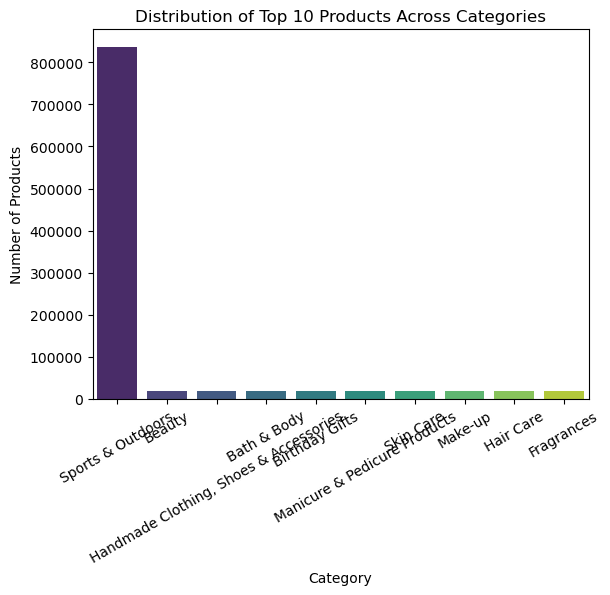

In [43]:
category_distribution = df['category'].value_counts().reset_index()
category_distribution.columns = ['category', 'count']
top_categories = category_distribution.head(10)['category']
df_top_categories = df[df['category'].isin(top_categories)]
sns.barplot(x='category', y='count', data=category_distribution.head(10), palette='viridis')

plt.title('Distribution of Top 10 Products Across Categories')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=30)


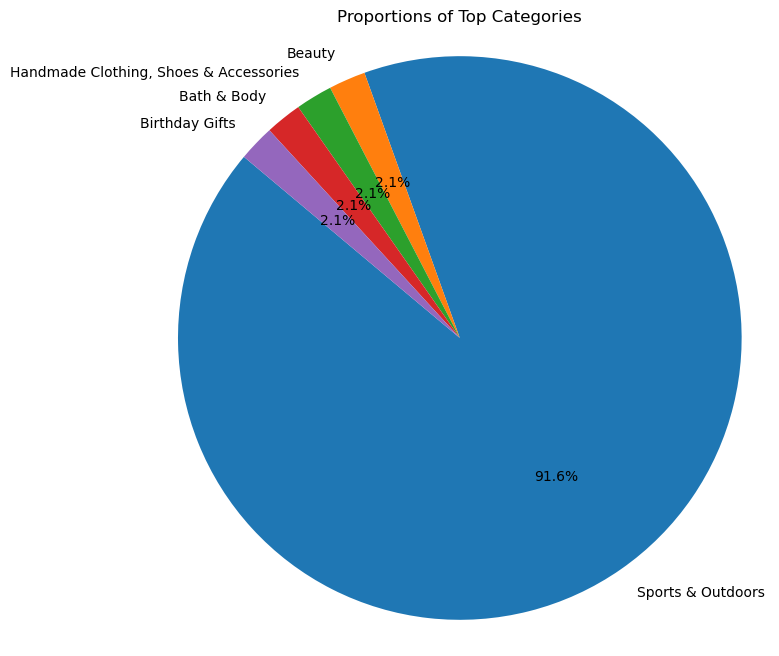

In [46]:
category_distribution = df['category'].value_counts().reset_index()
category_distribution.columns = ['category', 'count']

top_categories_subset = category_distribution.head(5)

plt.figure(figsize=(8, 8))
plt.pie(top_categories_subset['count'], labels=top_categories_subset['category'], autopct='%1.1f%%', startangle=140)
plt.title('Proportions of Top Categories')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

In [ ]:
# Sports and outdoors category dominates the other categories - as it was also listed above 

In [ ]:
# 2.1  To analyze product pricing on Amazon UK and identify common price points or ranges, you can follow these steps:


In [50]:
# 2.1. Calculate the mean, median, and mode for the price of products.

mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode().values[0]  # Mode can return multiple values, so we take the first one

print("Mean price:", mean_price)
print("Median price:", median_price)
print("Mode price:", mode_price)

Mean price: 89.24380943923663
Median price: 19.09
Mode price: 9.99


In [ ]:
# 2.2. What's the average price point of products listed? How does this compare with the most common price point (mode)?
# The average listed price in the UK is 19.09, higher than mode price which is 9.99, which is the most common price point. 

In [53]:
# 2.3.Measures of Dispersion:
# Determine the variance, standard deviation, range, and interquartile range for product price.
price_variance = df['price'].var()
price_std_dev = df['price'].std()
price_range = df['price'].max() - df['price'].min()
price_iqr = df['price'].quantile(0.75) - df['price'].quantile(0.25)

print (price_variance)
print (price_std_dev)
print (price_range)
print (price_iqr)

119445.48532256528
345.60886175352226
100000.0
36.0


In [ ]:
# How varied are the product prices? Are there any indicators of a significant spread in prices?
# --> The numbers above intricate large number of variety of price: The range is large and Iqr is high so that 
# standart deviation shows great variability and spread in prices. This means there are diverse product offerings with wide range of prices. 

In [ ]:
# 2.3. Visualizations:
# Is there a specific price range where most products fall? 
# Plot a histogram to visualize the distribution of product prices. 
# If its hard to read these diagrams, think why this is, and explain how it could be solved..
# Are there products that are priced significantly higher than the rest? 
# Use a box plot to showcase the spread and potential outliers in product pricing.

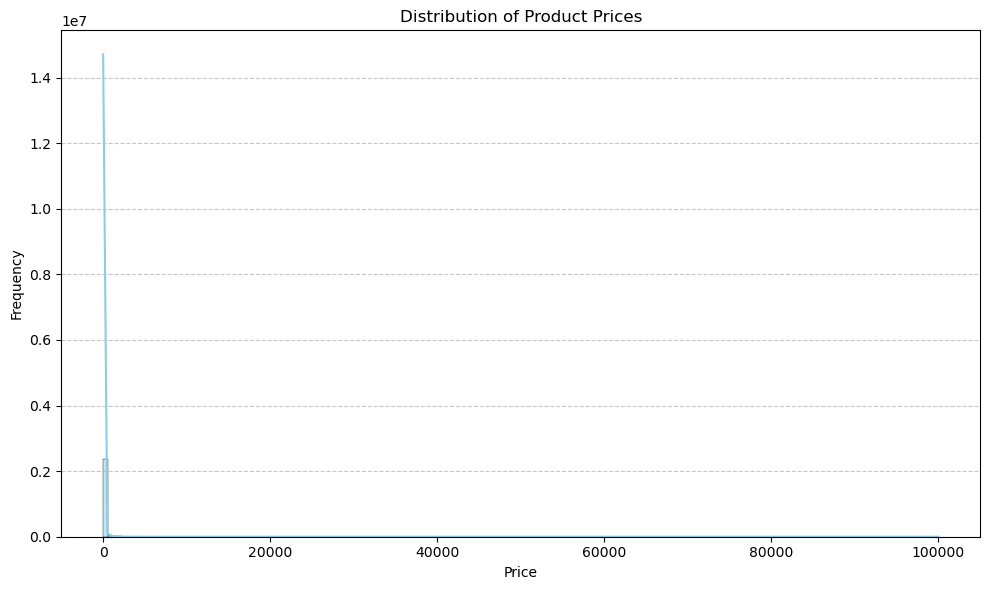

In [56]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=180, kde=True, color='skyblue')
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

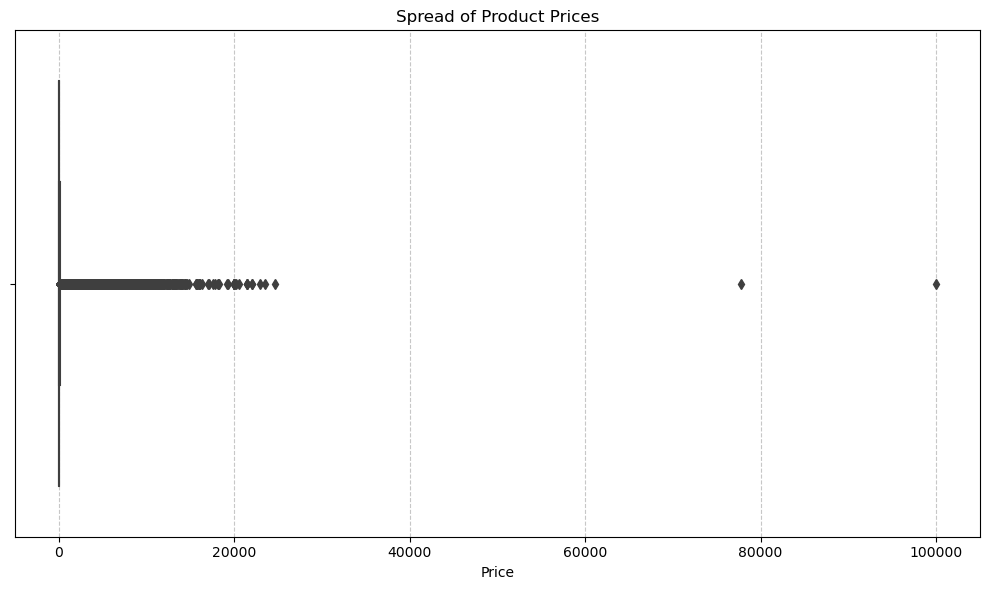

In [60]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])
plt.title('Spread of Product Prices')
plt.xlabel('Price')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# There are 2 products that are visible in the boxplot that, their prices are significantly higher than the other product prices.

In [ ]:
# Part 3: Unpacking Product Ratings
# Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

# Measures of Centrality:

# Calculate the mean, median, and mode for the rating of products.
# How do customers generally rate products? Is there a common trend?

In [63]:
# Ratings are shown in the column "stars"

mean_stars = df['stars'].mean()
median_stars = df['stars'].median()
mode_stars = df['stars'].mode().values[0]  # Mode can return multiple values, so we take the first one

print("Mean stars:", mean_stars)
print("Median stars:", median_stars)
print("Mode stars:", mode_stars)


Mean stars: 2.152836472966065
Median stars: 0.0
Mode stars: 0.0


In [64]:
# Mean ratings are higher then median and mode ratings -> this could mean that, there could be high amount of high ratings 
# in the dataset. Median and mode ratings show 0.0, which means there are a lot of product ratings that are very low. 
# Customers tend to give very low ratings - trend is in the low ratings. The mean, median and mode stars show that, 
# customers tend to give either very low or very high ratings (stars), so that the tendency is being extremely dissatisfied(0 ratings
# which indicates a biggest skew, or satisfied (high ratings).


In [66]:
rating_variance = df['stars'].var()
rating_std_dev = df['stars'].std()
rating_iqr = df['stars'].quantile(0.75) - df['stars'].quantile(0.25)

print("Variance of product ratings:", rating_variance)
print("Standard deviation of product ratings:", rating_std_dev)
print("Interquartile range (IQR) of product ratings:", rating_iqr)

Variance of product ratings: 4.81743402976196
Standard deviation of product ratings: 2.1948653785054697
Interquartile range (IQR) of product ratings: 4.4


In [67]:
if rating_std_dev < 1:
    feedback = "The ratings are relatively consistent."
else:
    feedback = "There is a wide variation in customer feedback."

print("\nFeedback on ratings consistency:", feedback)


Feedback on ratings consistency: There is a wide variation in customer feedback.


In [ ]:
# Standard deviation in the ratings is higher than the Interquartile range, which means ratings spread to a wide range and 
# there is no consistency in the user ratings. As it was stated in the median, mean and mode rating results, there is tendency 
# for very low (0) ratings.

In [ ]:
# 3.3 Shape of the Distribution:

Calculate the skewness and kurtosis for the rating column.
Are the ratings normally distributed, or do they lean towards higher or lower values?

In [70]:
import pandas as pd
from scipy.stats import skew, kurtosis

In [73]:
rating_skewness = skew(df['stars'])
print("Skewness of ratings:", rating_skewness)


Skewness of ratings: 0.08120730776283354


In [74]:
rating_kurtosis = kurtosis(df['stars'])
print("Kurtosis of ratings:", rating_kurtosis)


Kurtosis of ratings: -1.926004642549839


In [ ]:
# The distribution is positively skewed as it shows a positive value, so the skew is leaning towards higher values.
# The distribution kurtosis on the other hand shows negative value which means the distribution has heavier tails.

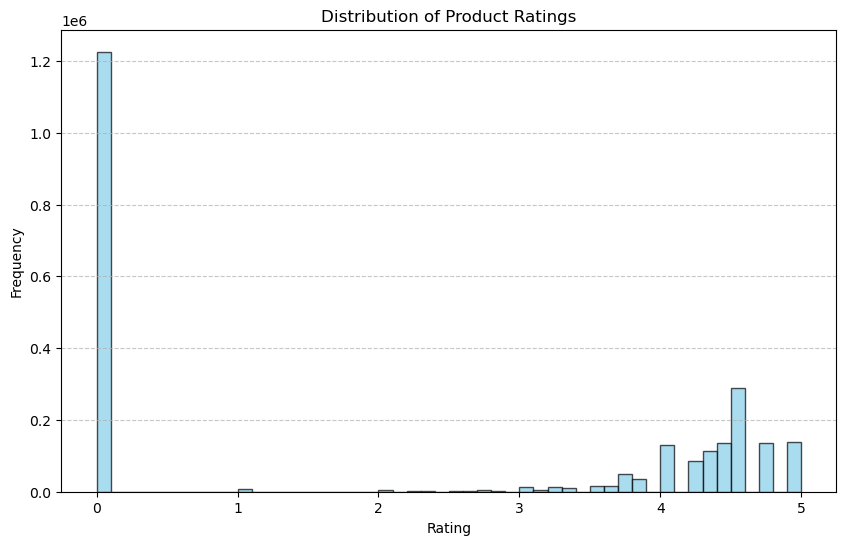

In [83]:
plt.figure(figsize=(10, 6))
plt.hist(df['stars'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Product Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
